#### AOS 575 - jackknife example - Lecture, 9/16/2020
Originally coded by Prof. Barnes (CSU), <br>
updated/adapted for Jupyter Notebook/Python3 by Prof. Kay (CU), Last updated: January 10, 2019 <br>
updated for AOS 575 by Prof. Maroon <br>
Last updated 9/11/2020

In [1]:
#import packages
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
import seaborn as sns

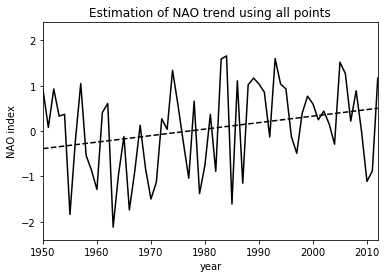

In [2]:
#load data
DATA = sio.loadmat('nao_timeseries.mat')         #loading in NAO index from a Matlab file
X = DATA['NAO'][:,0] # grab January data only
TIME_NAO = DATA['TIME_NAO'][:,0]

#%% plot data
plt.plot(TIME_NAO,X,color = 'black', linewidth = 1.5)
pfull = np.polyfit(TIME_NAO,X,1)                                #calculating linear trend
plt.plot(TIME_NAO,TIME_NAO*pfull[0]+pfull[1],'--',color = 'black', linewidth = 1.5)
plt.xlabel('year');
plt.ylabel('NAO index');
plt.title('Estimation of NAO trend using all points');
plt.ylim(-2.4,2.4);
plt.xlim(min(TIME_NAO), max(TIME_NAO));

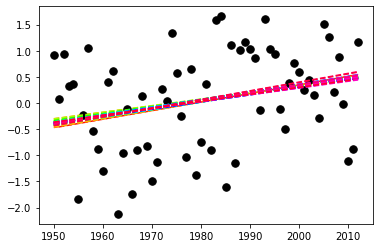

In [3]:
cpal=sns.color_palette('hsv',len(X))

M = np.empty([len(X),2])

for j, val in enumerate(X):     #loop through all possible values
    X2 = X                      #reset our subsampled X2 to original X
    X2 = np.delete(X2,j)        #get rid of time at chosen index
    T2 = TIME_NAO               #reset our subsampled NAO to original NAO
    T2 = np.delete(T2,j)        #get rid of NAO at chosen index
    pfull = np.polyfit(T2,X2,1) #fit linear trend
    
    M[j,0] = pfull[0]
    M[j,1] = pfull[1]
    
    plt.plot(TIME_NAO[j],val,'.',color = 'black', markersize = 15)
    plt.plot(T2,T2*pfull[0] + pfull[1],'--', color = cpal[j])

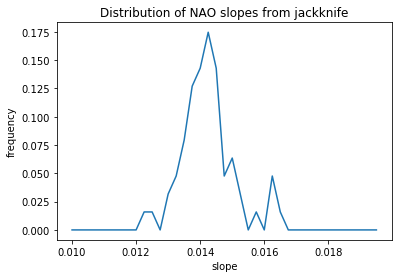

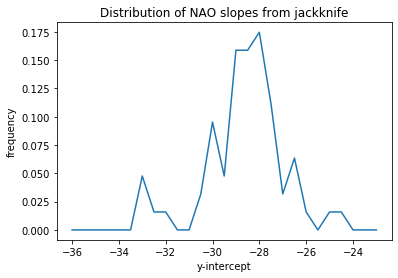

In [4]:
xint = np.arange(.01,.02,.00025)
y, bin_edges = np.histogram(M,xint)
plt.plot(bin_edges[:-1],y/float(len(M)))
plt.xlabel('slope')
plt.ylabel('frequency')
plt.title('Distribution of NAO slopes from jackknife')
plt.show()

xint = np.arange(-36.,-22.,.5)
y, bin_edges = np.histogram(M,xint)
plt.plot(bin_edges[:-1],y/float(len(M)))
plt.xlabel('y-intercept')
plt.ylabel('frequency')
plt.title('Distribution of NAO slopes from jackknife')
plt.show()